Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import matplotlib.pyplot as plt
%matplotlib inline

# Data understanding and EDA

In [63]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [64]:
df.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [65]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [67]:
print('unique_cc1',df.cc1_miles.unique())
print('unique_cc2',df.cc2_miles.unique())
print('unique_cc3',df.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [68]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

# Exploratory Data Analysis

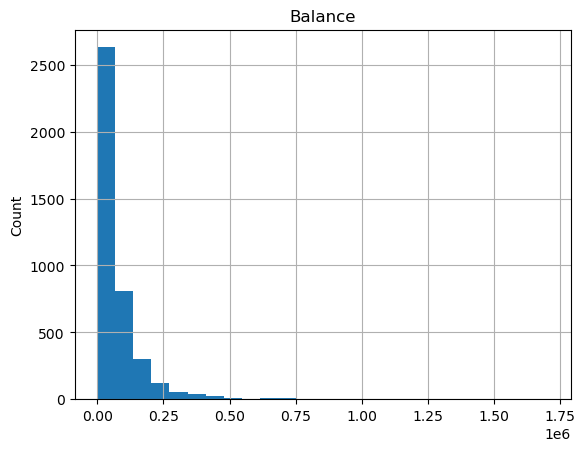

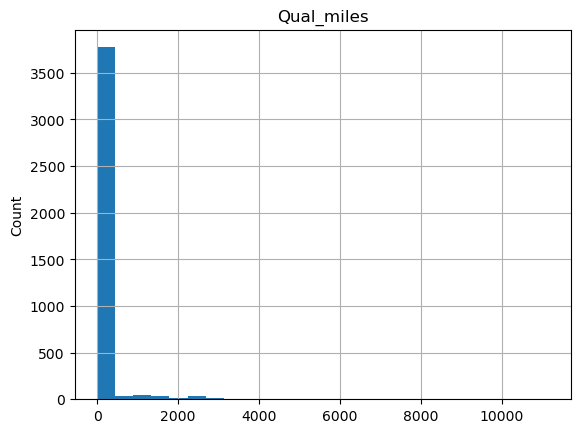

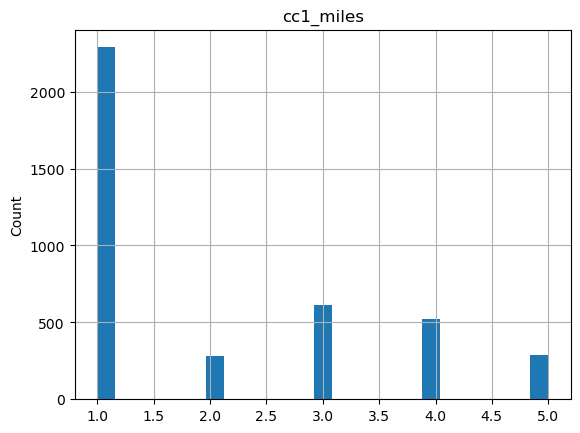

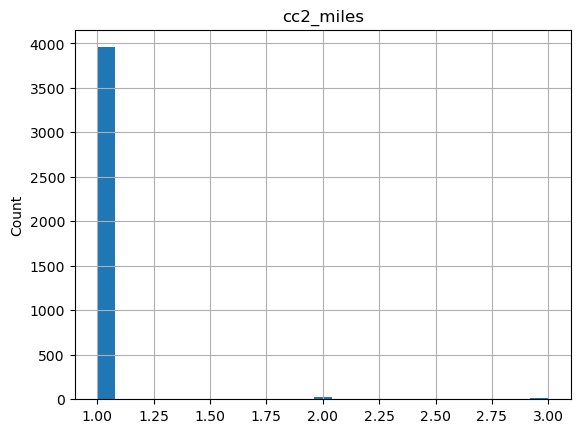

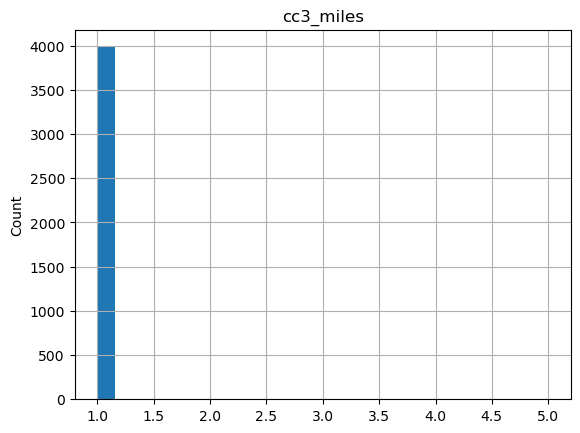

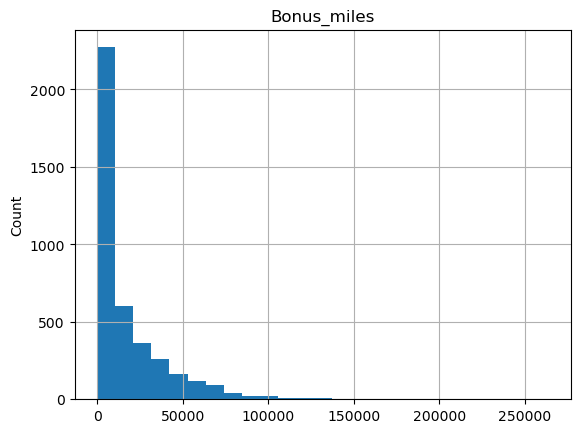

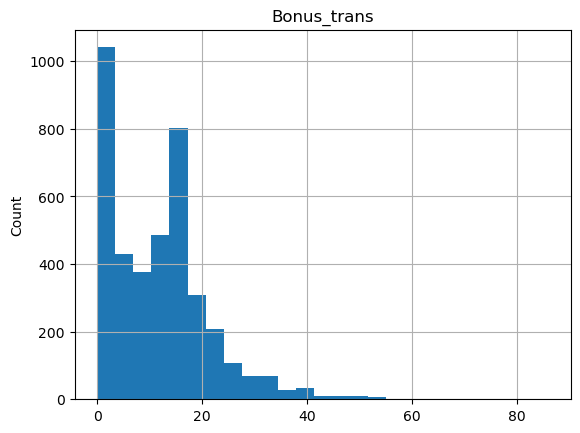

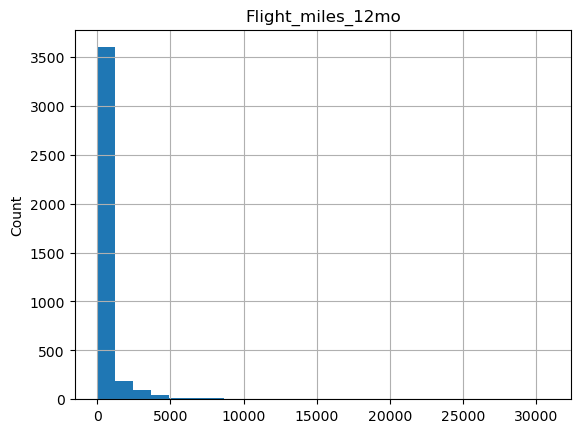

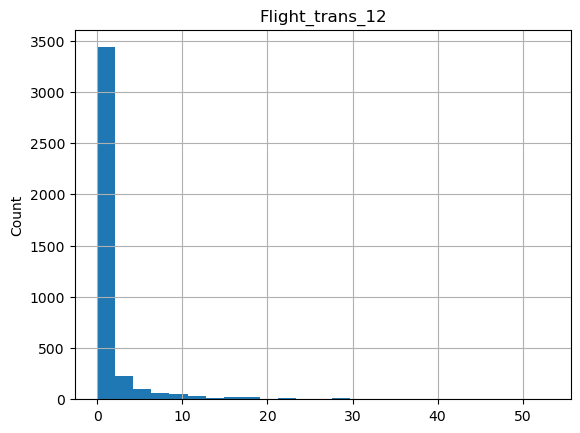

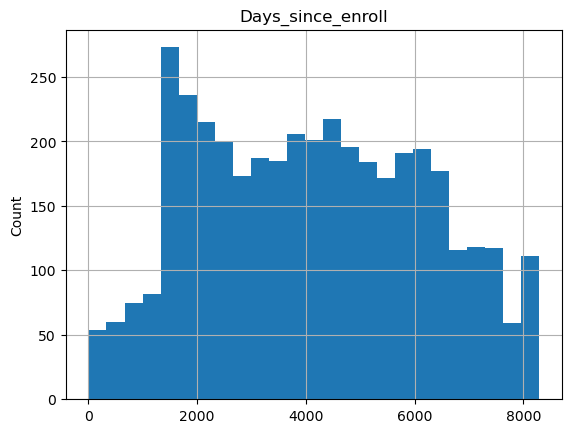

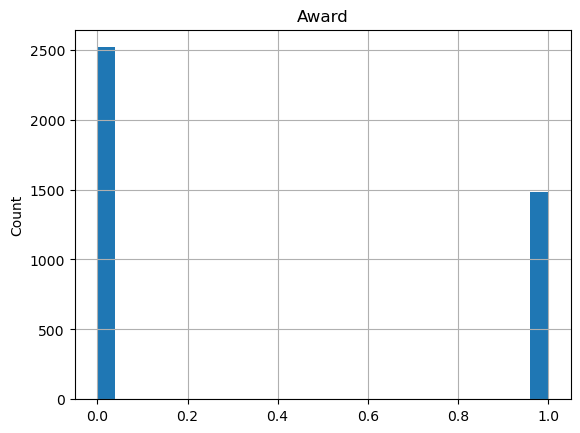

In [69]:
for feature in df.columns:
    df1=df.copy()
    df1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [70]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

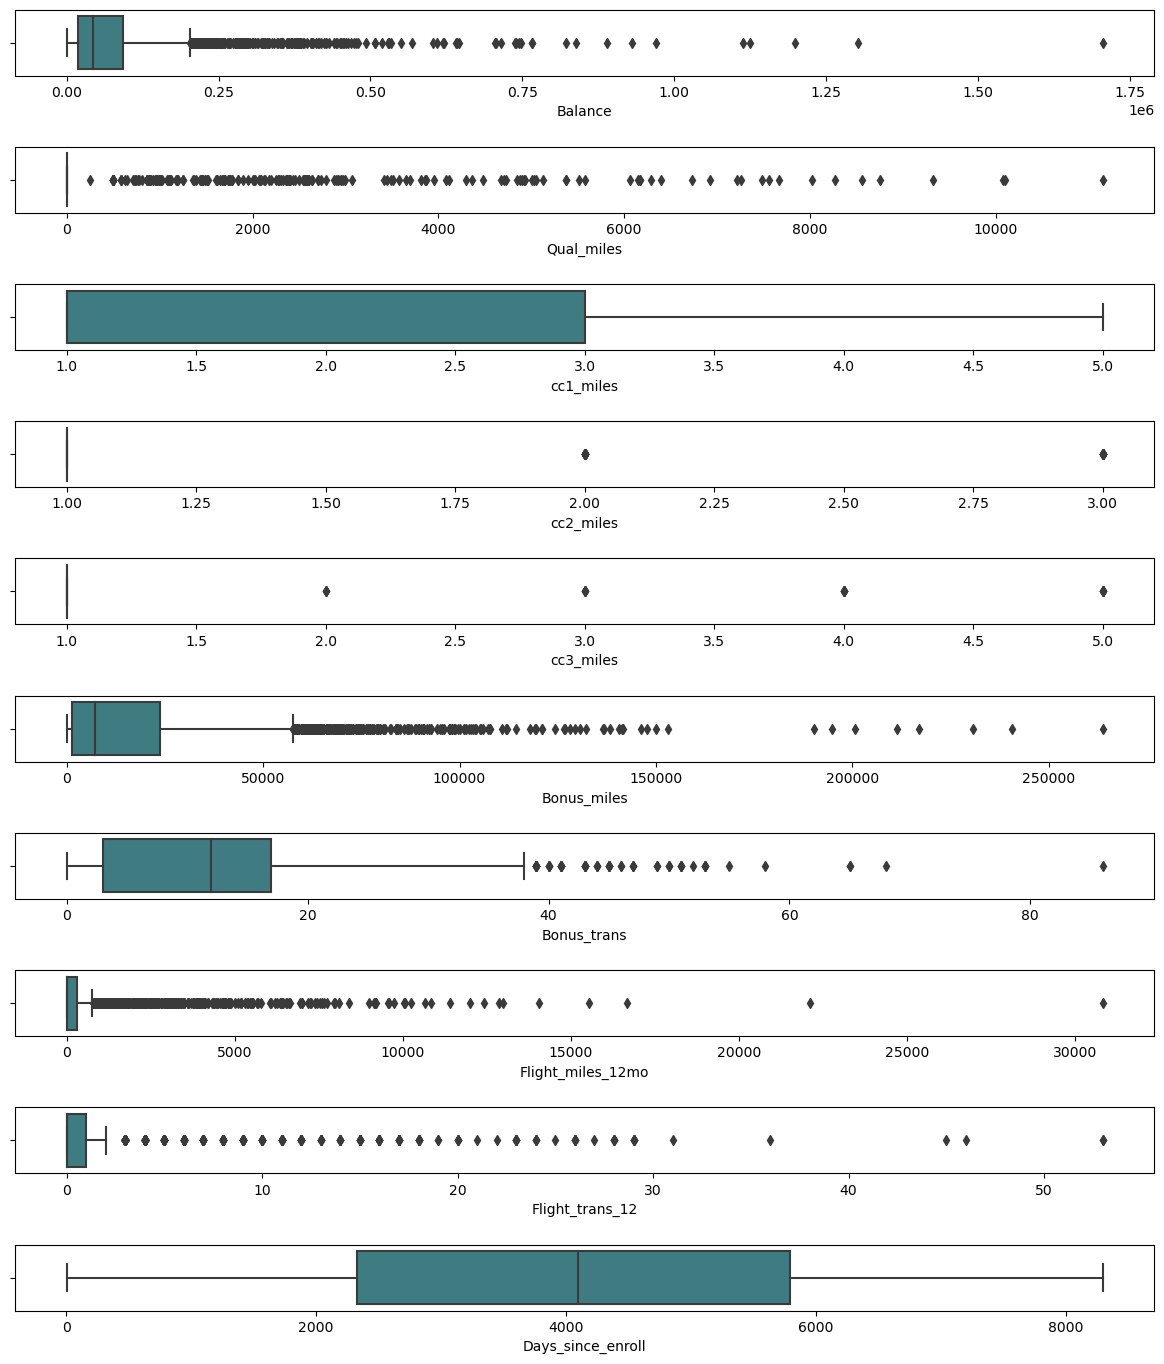

In [71]:
outlier=df.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [72]:
countNotermdeposit = len(df[df.Award == 0])
countHavetermdeposit = len(df[df.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(df.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(df.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


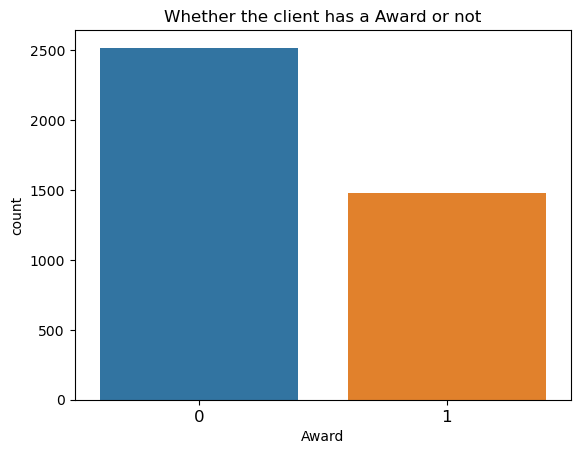

In [73]:
sns.countplot(x='Award', data= df, order= df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')
plt.show()

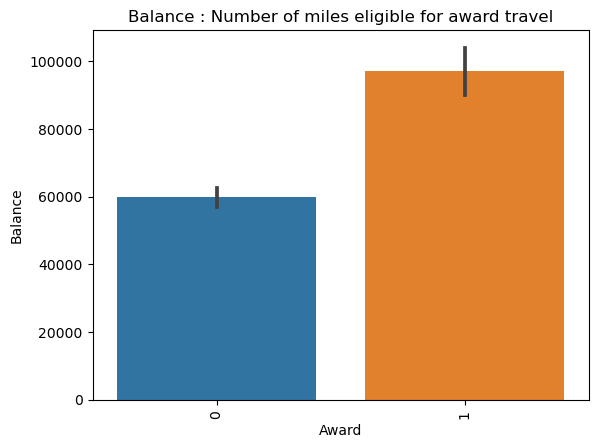

In [74]:
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.title('Balance : Number of miles eligible for award travel')
plt.xticks(rotation=90)
plt.show()

In [75]:
corr_matrix=df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

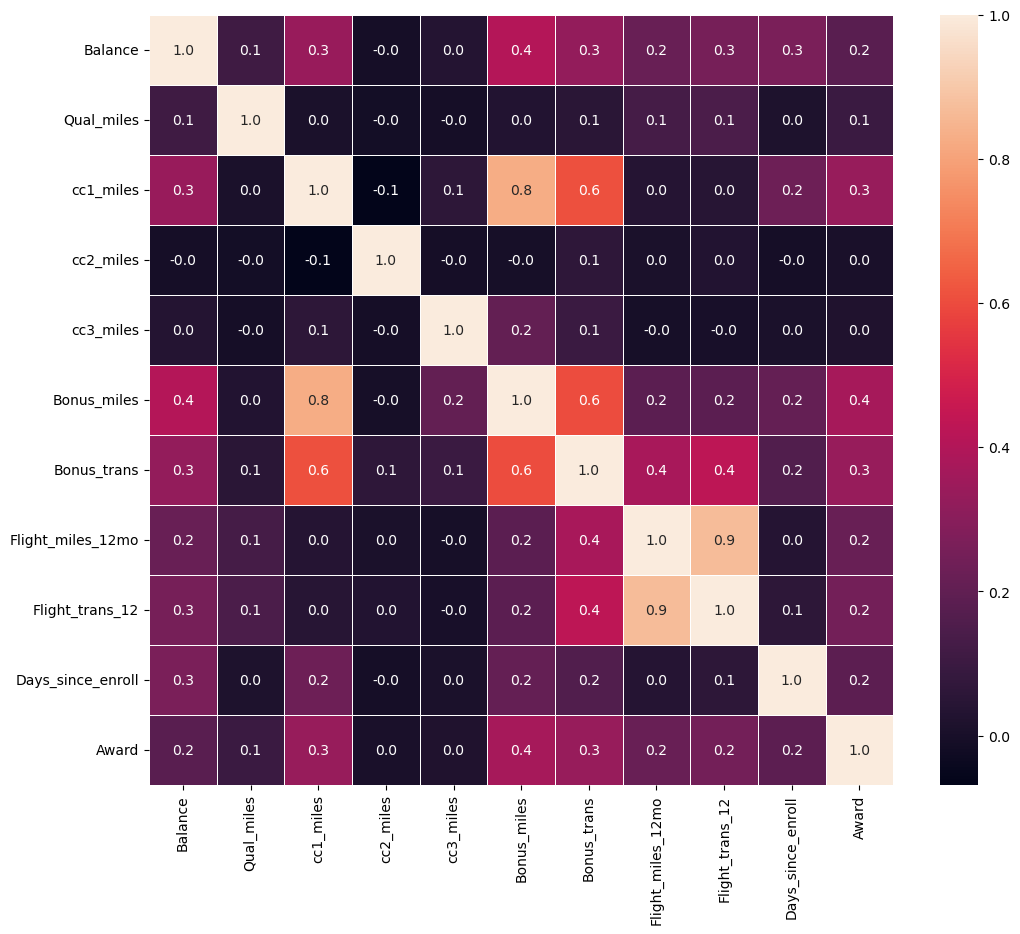

In [76]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

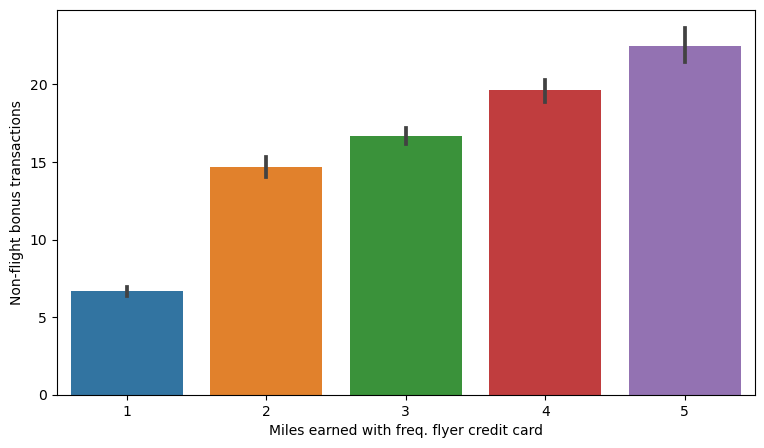

In [77]:
plt.figure(figsize = (9,5))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

In [78]:
standard_scaler=StandardScaler()
std_df=standard_scaler.fit_transform(df)
std_df.shape

(3999, 11)

In [79]:
minmax=MinMaxScaler()
norm_airline=minmax.fit_transform(df)
norm_airline.shape

(3999, 11)

In [80]:
cluster_range= range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,43989.000000
1,2,35409.516630
2,3,30906.161177
3,4,27154.044058
4,5,23706.569465
5,6,21471.289911
6,7,18893.594348
7,8,17316.753604
8,9,15960.406001
9,10,14726.983323


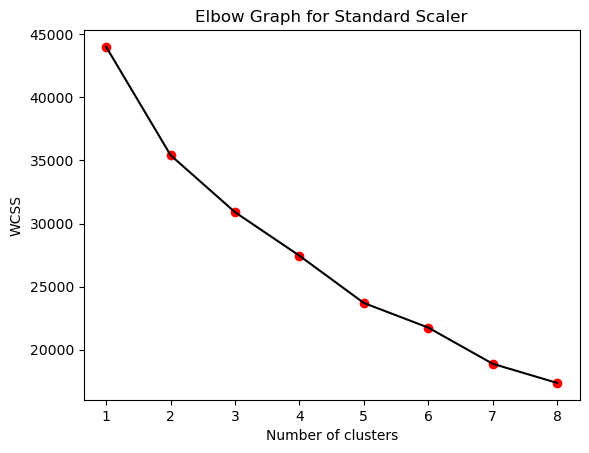

In [81]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,9),wcss,color='black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score,calinski_harabasz_score,silhouette_samples

In [83]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg)

In [84]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for standardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= silhouette_score(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.32542136327826215
For n_clusters = 3 The average silhouette_score is : 0.31191384766627117
For n_clusters = 4 The average silhouette_score is : 0.3099108192228768
For n_clusters = 5 The average silhouette_score is : 0.3353447174269873
For n_clusters = 6 The average silhouette_score is : 0.2788033904667631
For n_clusters = 7 The average silhouette_score is : 0.2836461929303771
For n_clusters = 8 The average silhouette_score is : 0.23655403102028674
For n_clusters = 9 The average silhouette_score is : 0.24591745011173718


In [85]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

In [86]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [87]:
model_kmeans.cluster_centers_

array([[-0.15436921,  0.12224133, -0.26678883, -0.09824189, -0.06276658,
        -0.26852042, -0.10347479, -0.02661461, -0.01991719,  0.05352069,
         1.29384109],
       [-0.29965686, -0.09342981, -0.54597866, -0.09824189, -0.06030264,
        -0.51318446, -0.46455782, -0.21545477, -0.23737426, -0.24011724,
        -0.7669193 ],
       [ 0.63426351, -0.01770954,  1.48483175, -0.09824189, -0.05145859,
         1.26492109,  0.84042624, -0.06283237, -0.06241679,  0.45899739,
         0.43992637],
       [ 1.25116283,  0.87901237,  0.16817169, -0.09824189, -0.06276658,
         0.73352254,  1.76984334,  3.89902834,  4.14964398,  0.29011908,
         0.9330219 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [88]:
model_kmeans.inertia_

21470.514549809268

In [89]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_Label'] = model_kmeans.labels_


In [90]:
df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1964.041363,58046.613139,238.676399,1.692214,1.000000,1.000000,10660.628954,10.608273,422.794404,1.298054,4229.072993,0.995134
1,2278.765159,43402.377767,71.874880,1.307026,1.000000,1.000481,4746.563041,7.137632,158.487969,0.473532,3620.526468,0.000000
2,1494.157663,137418.463065,130.271224,4.102536,1.000000,1.002205,47656.343991,19.665932,371.678060,1.135612,5069.828004,0.582139
3,1714.850746,199672.328358,824.089552,2.291045,1.000000,1.000000,34857.910448,28.597015,5918.828358,17.111940,4717.619403,0.820896
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


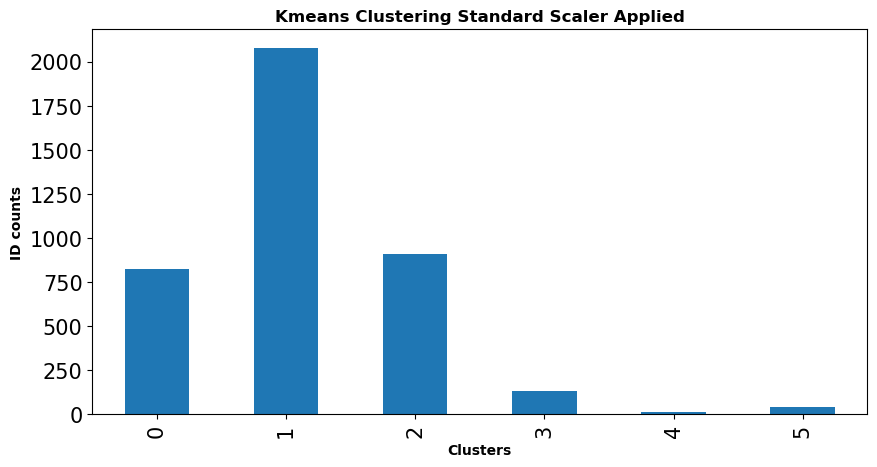

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [92]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df


,Num_Clusters,Cluster_Errors
0,1,1830.793213
1,2,823.675698
2,3,625.168488
3,4,436.708858
4,5,348.943322
5,6,315.313629
6,7,287.927702
7,8,263.046483
8,9,243.916647
9,10,231.769990


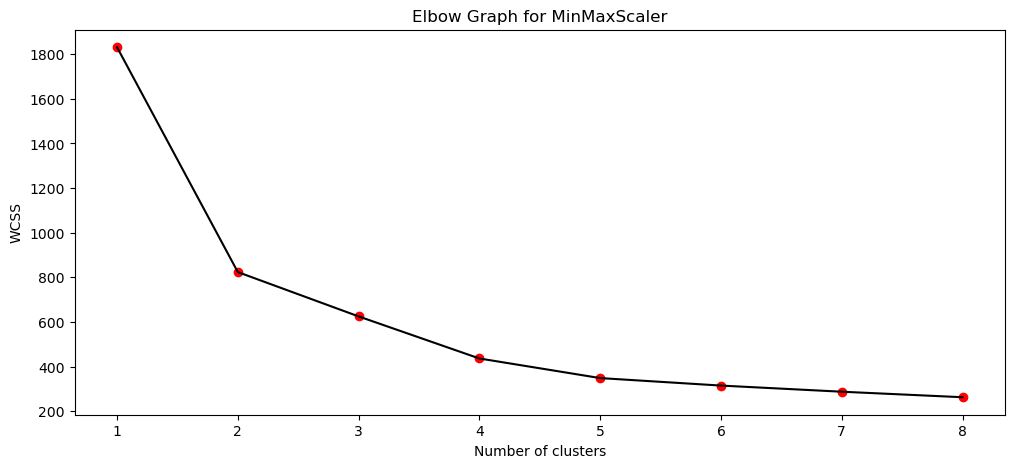

In [93]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_airline)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(range(1,9), wcss,color = 'black')
plt.scatter(range(1,9), wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [94]:
lust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_airline)
    sil_score1= silhouette_score(norm_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.4646127065079619
For n_clusters = 4 The average silhouette_score is : 0.47483765255961
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.4021621004641961
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38088072642749815
For n_clusters = 9 The average silhouette_score is : 0.38454330389289343


In [95]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_airline)
y_predict_kmeans.shape

(3999,)

In [96]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [97]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [98]:
model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50812450e-02,  7.85813260e-03,  1.76330421e-01,
         6.94996029e-03,  2.18427323e-03,  3.87875269e-02,
         1.06313612e-01,  7.34309944e-03,  1.23113582e-02,
         4.60411394e-01, -3.05311332e-15]])

In [99]:
model_kmeans.inertia_

823.6756984125209

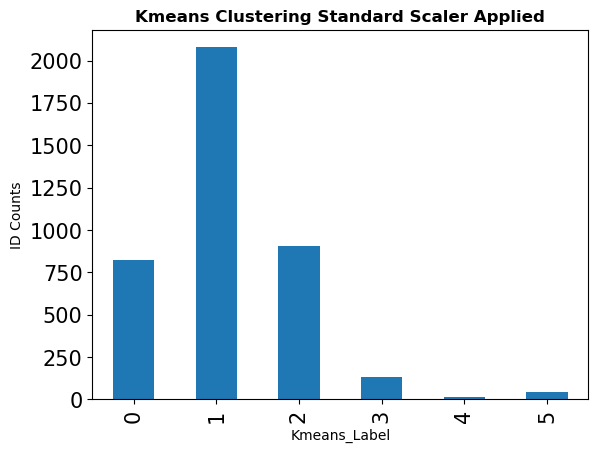

In [100]:
df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [101]:
df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1964.041363,58046.613139,238.676399,1.692214,1.000000,1.000000,10660.628954,10.608273,422.794404,1.298054,4229.072993,0.995134
1,2278.765159,43402.377767,71.874880,1.307026,1.000000,1.000481,4746.563041,7.137632,158.487969,0.473532,3620.526468,0.000000
2,1494.157663,137418.463065,130.271224,4.102536,1.000000,1.002205,47656.343991,19.665932,371.678060,1.135612,5069.828004,0.582139
3,1714.850746,199672.328358,824.089552,2.291045,1.000000,1.000000,34857.910448,28.597015,5918.828358,17.111940,4717.619403,0.820896
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [102]:
import scipy.cluster.hierarchy as sch

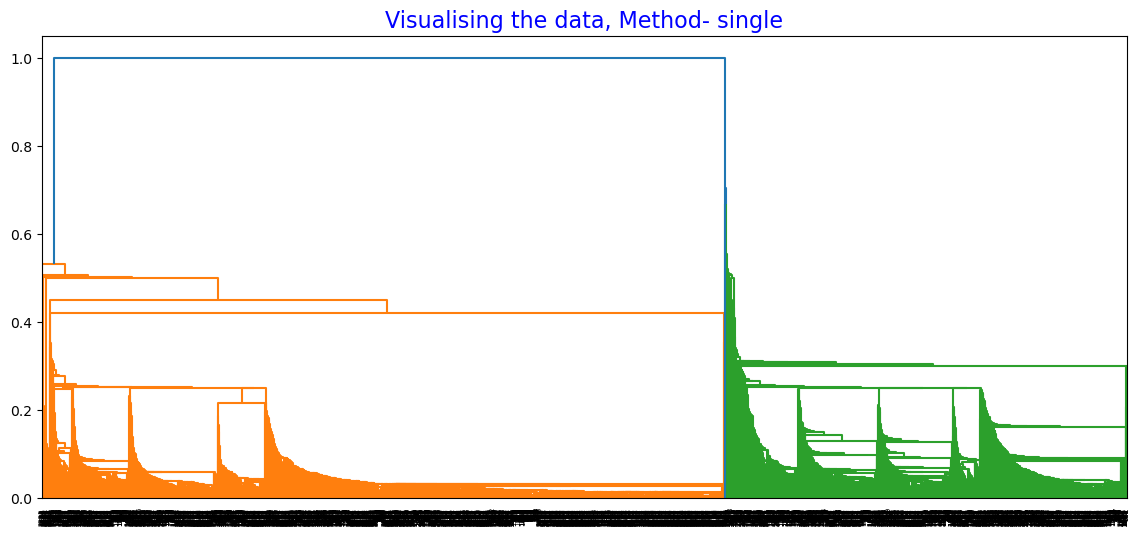

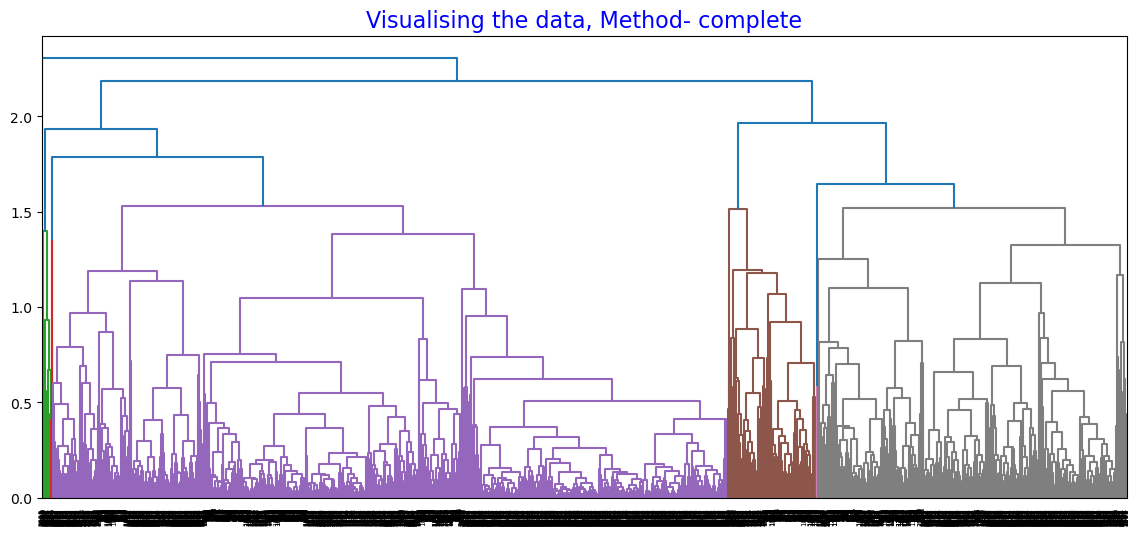

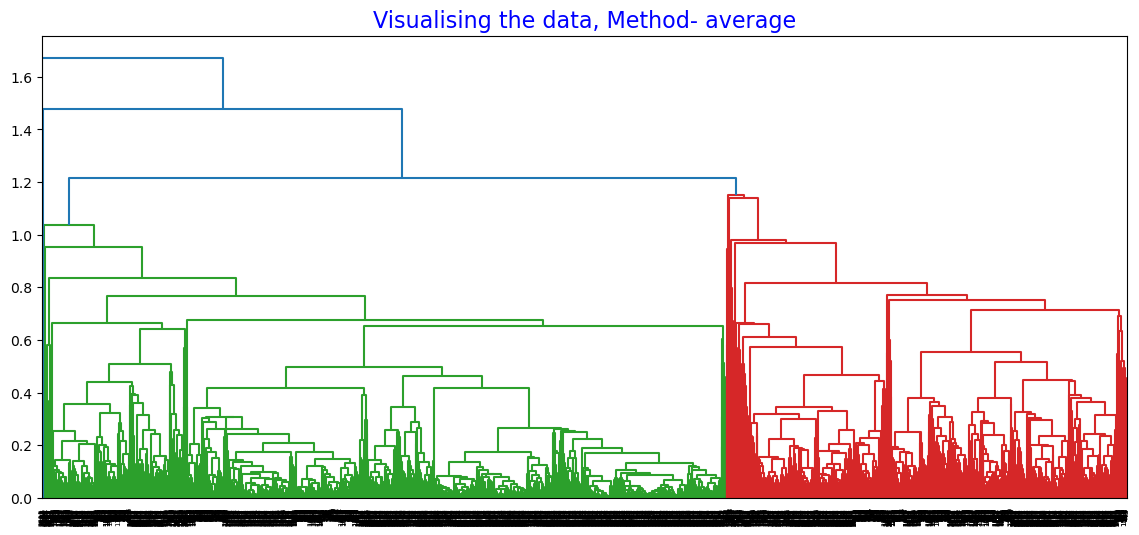

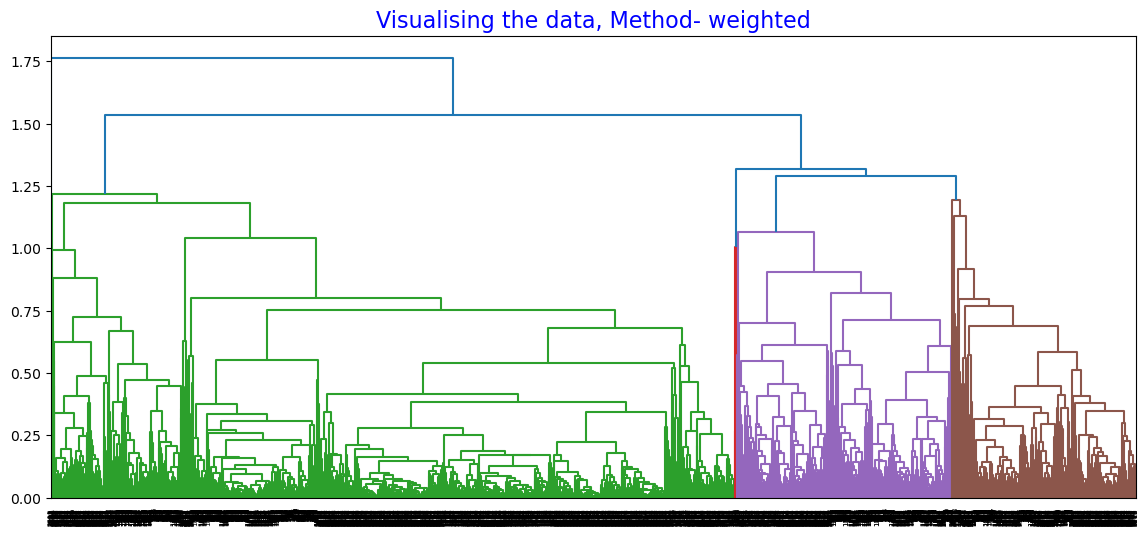

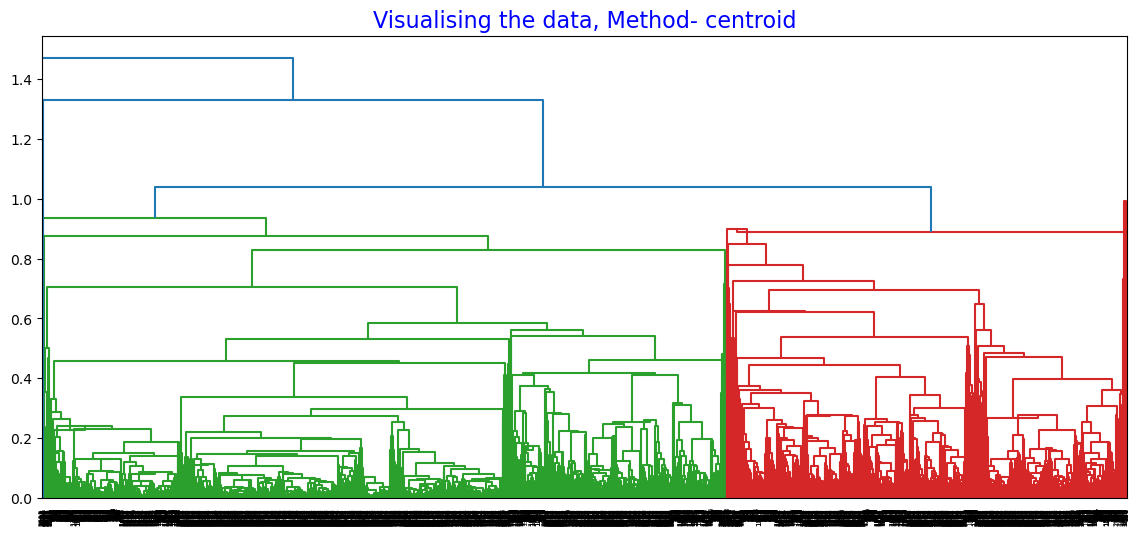

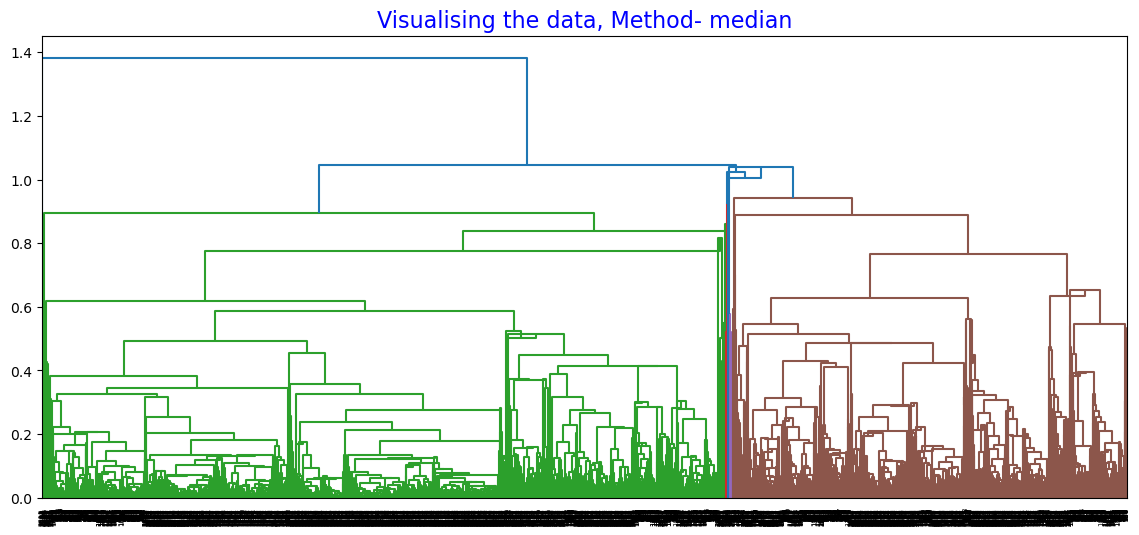

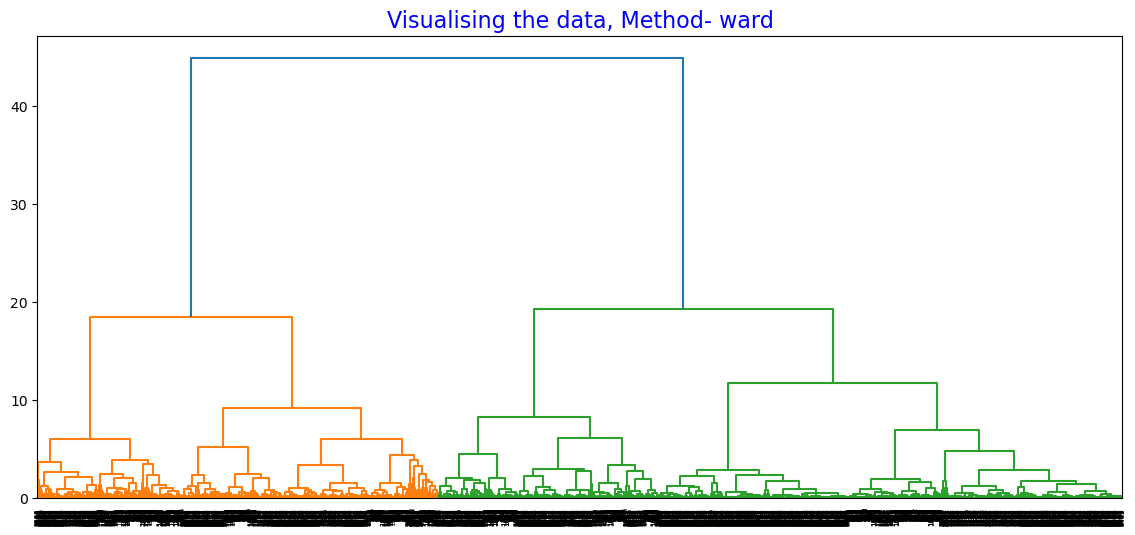

In [103]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))    
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_airline, method = methods,optimal_ordering=False))

In [104]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [105]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_airline)
        silhouette_score1 = silhouette_score(norm_airline, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

In [106]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_airline)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [107]:
agg_clustering.n_clusters_

2

In [108]:
(silhouette_score(norm_airline, agg_clustering.labels_)*100).round(3)

53.593

In [109]:
df['Hierarchical_Labels'] = agg_clustering.labels_

In [110]:
df.groupby('Hierarchical_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.217633
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.014855


In [111]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [112]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


In [113]:
dbscan=DBSCAN(eps=2.5,min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [114]:
df['DBSCAN_Labels']=dbscan.labels_

In [115]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0


In [116]:
df.groupby('DBSCAN_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
-1,1708.947115,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,3.009615,0.687500
0,2031.601688,66008.336587,68.482722,2.034819,1.000000,1.000000,15598.138486,10.880243,305.532577,0.925086,4082.893959,0.352941,1.040095,0.352941


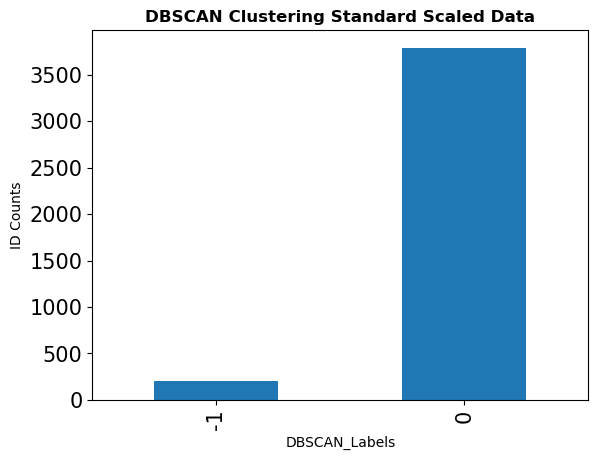

In [117]:
df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [118]:
eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [124]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_airline,DBS_clustering.labels_))

In [125]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [126]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


In [127]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(norm_airline)

DBSCAN(eps=1, min_samples=22)

In [128]:
df['DBSCAN_Labels']=dbscan.labels_
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,1


In [129]:
df.groupby('DBSCAN_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.217633,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.014855,1.0


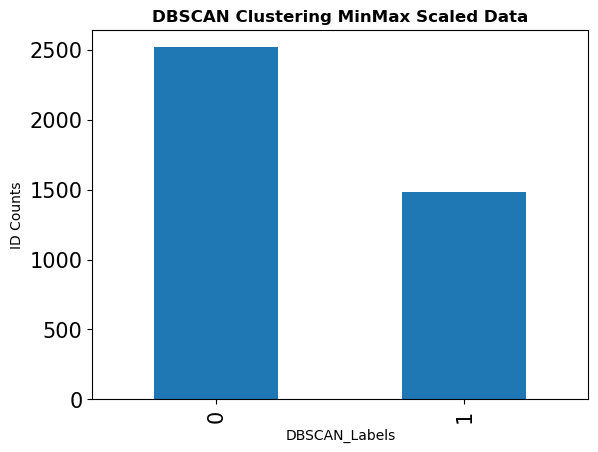

In [130]:
df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [131]:
cluster1 = pd.DataFrame(df.loc[df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_airline = pd.concat([cluster1,cluster2],axis=1)
avg_airline

,Cluster1_Avg,Cluster2_Avg
ID,2173.169182,1745.592843
Balance,59807.839555,97053.051317
Qual_miles,87.602462,240.196489
cc1_miles,1.705322,2.661715
cc2_miles,1.013900,1.015530
cc3_miles,1.008737,1.018231
Bonus_miles,10227.689039,28905.414585
Bonus_trans,9.142971,15.782579
Flight_miles_12mo,226.292295,857.501013
Flight_trans_12,0.652502,2.599595
